### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Fidelity

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

Note: This set of benchmarks exercises the fidelity-oriented assessment described in the paper: https://arxiv.org/abs/2409.06919

See other notebooks for new benchmarks that exercise the recently added "observables" capability.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=12
skip_qubits=1
max_circuits=1
num_shots=1000

backend_id="nvidia"

hub=""; group=""; project=""
provider_backend = None
exec_options = {}

api="cudaq"

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider (backend_id=CPU/QPU, device=cpu/qpu)
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":"cpu" }

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


In [4]:
# Configure benchmark library modules (for debugging)
import sys
sys.path.insert(1, "..")
sys.path.insert(1, "../_common/cudaq")
sys.path.insert(1, "cudaq")
                
import execute
execute.verbose = False
execute.verbose_time = False
#execute.noise = None

# ... access to HamLib datasets
import hamlib._common.hamlib_utils as hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False


### Hamiltonian Simulation - Method 1 
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes the fidelity of Trotterized simulation using method 1, in which the resulting measurement distribution is compared against the distribution obtained from executing on an ideal classically implemented quantum simulator (noiseless). The difference in fidelity from 1.0 represents the effect of  noise in the backend target system.

 cannot import name 'QuantumCircuit' from 'qiskit' (unknown location)
Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = condensedmatter/tfim/tfim, {'1D-grid': 'pbc', 'h': 2}
... group_method = None
... execution starting at Jan 25, 2026 20:48:19 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 8
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 69, 0.328
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 69, 0.328, 40.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.18, 0.179 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.99, 0.975

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 10
************
Av

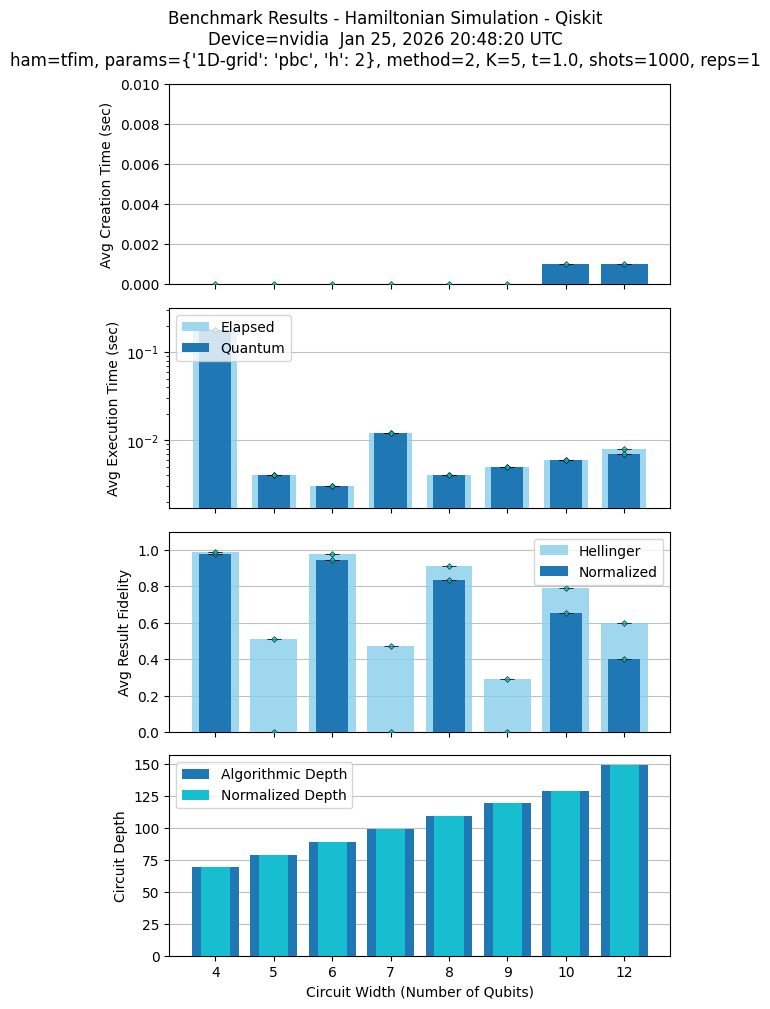

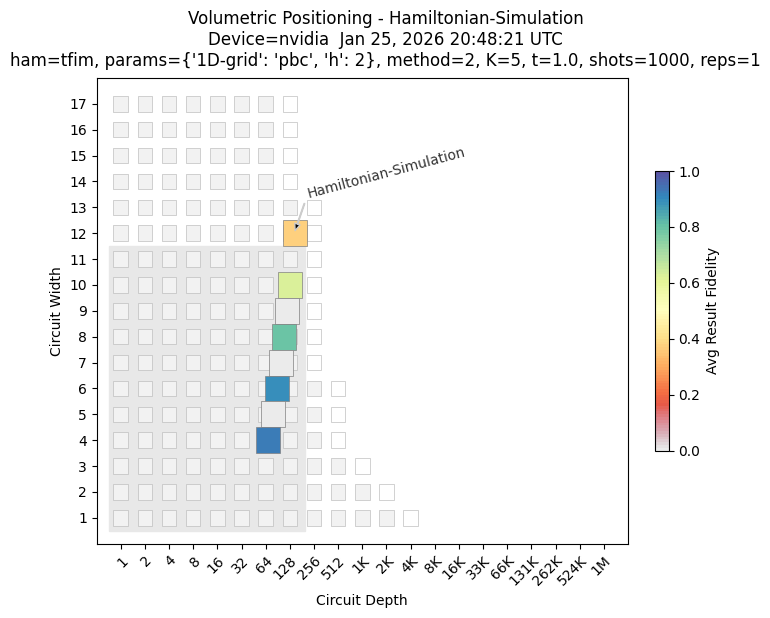

In [5]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,    
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options, api=api)

### Hamiltonian Simulation - Method 2
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes the fidelity of Trotterized simulation using method 2, in which the resulting measurement distribution is compared against the distribution obtained from classically simulating the same Hamlitonian to the specified time. The difference in fidelity from 1.0 represents the effect of both noise in the backend target system and the accumulated Trotter error. 

Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = condensedmatter/bosehubbard/BH_D-1_d-4, {'1D-grid': 'nonpbc', 'enc': 'gray', 'U': 10}
... group_method = None
... execution starting at Jan 25, 2026 20:48:24 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 39
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 962, 0.442
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 962, 0.442, 660.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 0.084, 0.083 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.84, 0.829

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 74
******

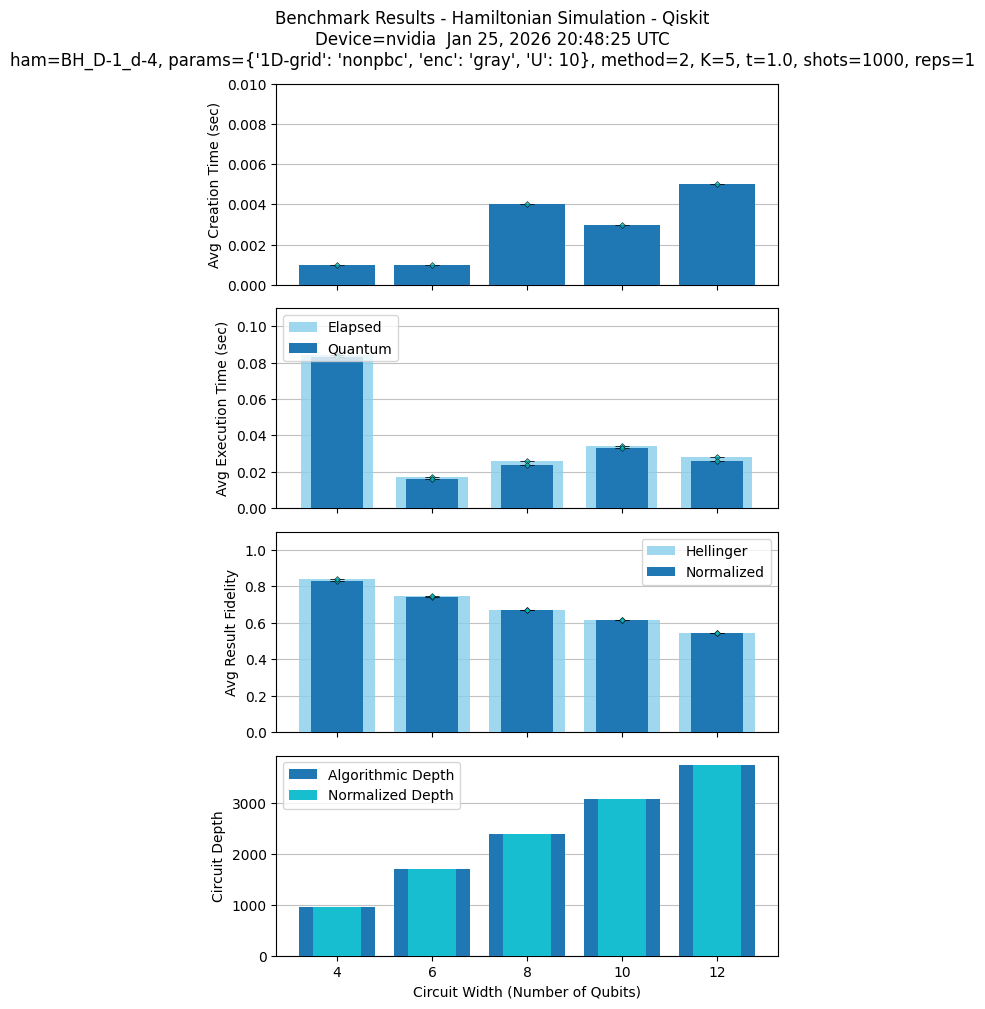

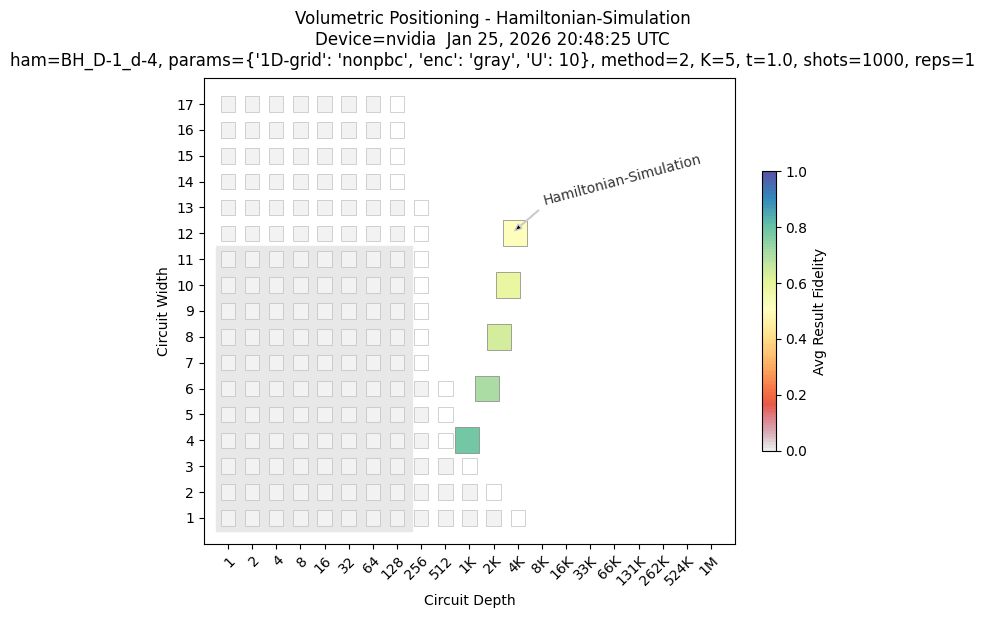

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=2, hamiltonian = hamiltonian_name,
    hamiltonian_params = hamiltonian_params,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options, api=api
)

### Hamiltonian Simulation - Method 3
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes the fidelity of Trotterized simulation using method 3, in which the Trotterized circuit is followed by the inverse of the Trotterized circuit and the resulting measurement distribution is compared against a distribution directly from the initial state. We take the square root of  fidelity obtained due to the doubling of the circuit depth. The difference in fidelity from 1.0 represents the effect of noise in the backend target system. This benchmark is scalable to larger numbers of qubits since it does not require a classical implementation of Hamiltonian simulation.

Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = binaryoptimization/max3sat/random/random_max3sat-hams, {'ratio': '2', 'rinst': '02'}
... group_method = None
... execution starting at Jan 25, 2026 20:48:28 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... number of terms in Hamiltonian = 12
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 135, 0.659
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 135, 0.659, 110.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.084, 0.084 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... number of terms in Hamiltonian = 17
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit

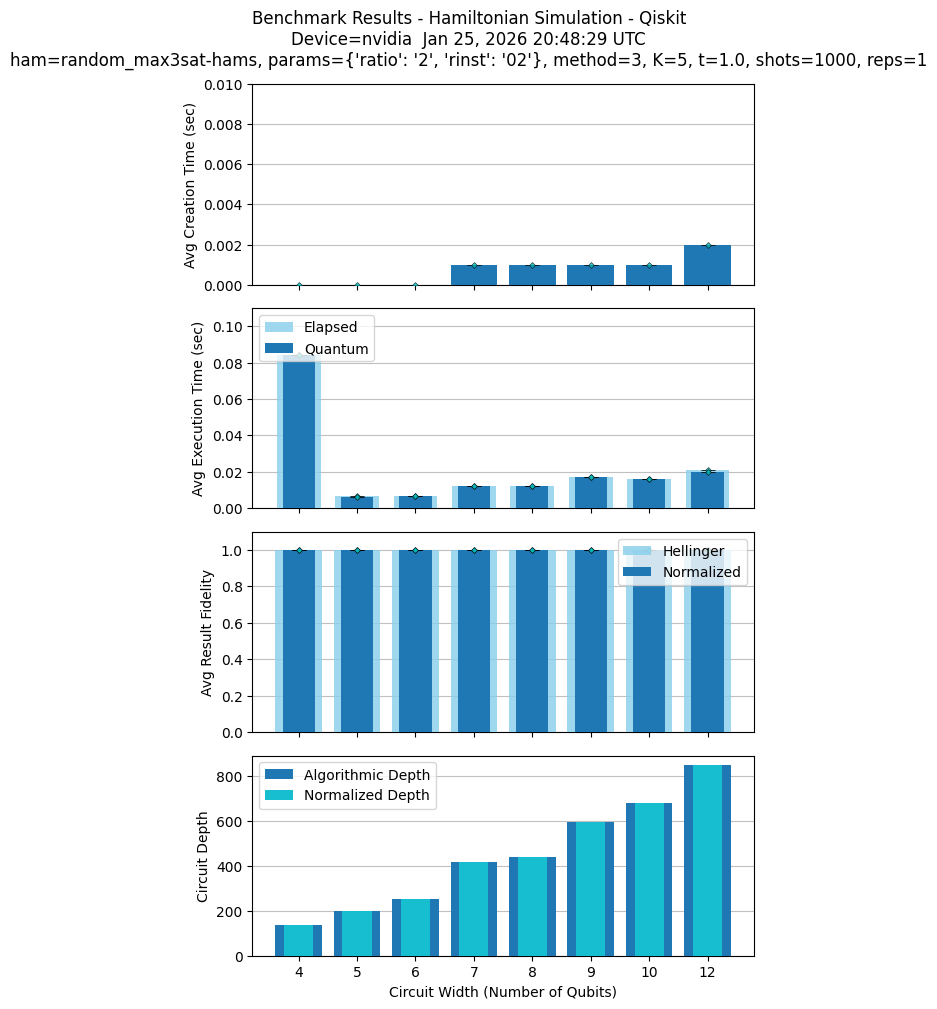

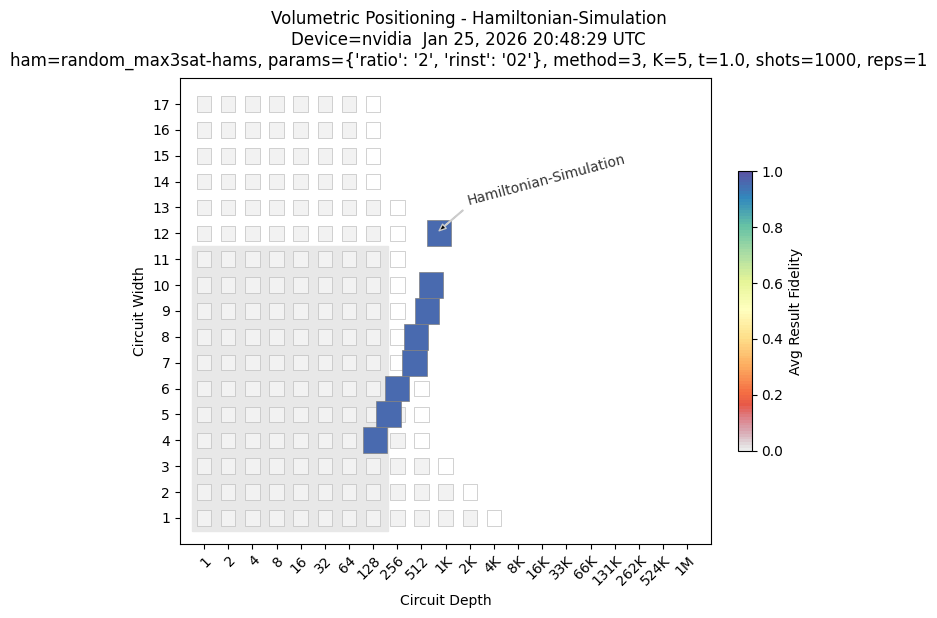

In [7]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=3, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,
                do_sqrt_fidelity = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options, api=api)

### Hamiltonian Simulation - Method 3

Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = chemistry/electronic/standard/H2, {'ham_BK': ''}
... group_method = None
... execution starting at Jan 25, 2026 20:48:30 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... number of terms in Hamiltonian = 15
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 282, 0.591
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 282, 0.591, 220.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.069, 0.069 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... number of terms in Hamiltonian = 62
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 2168, 0.497
Average Normalized Transpiled Depth, ξ (xi), 2q gates f

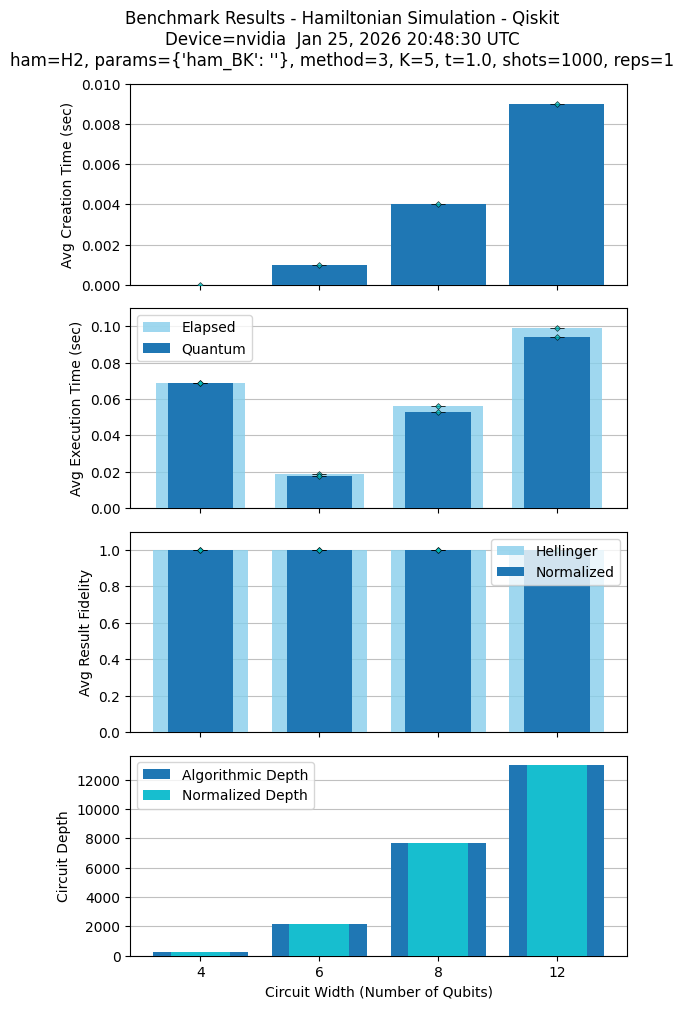

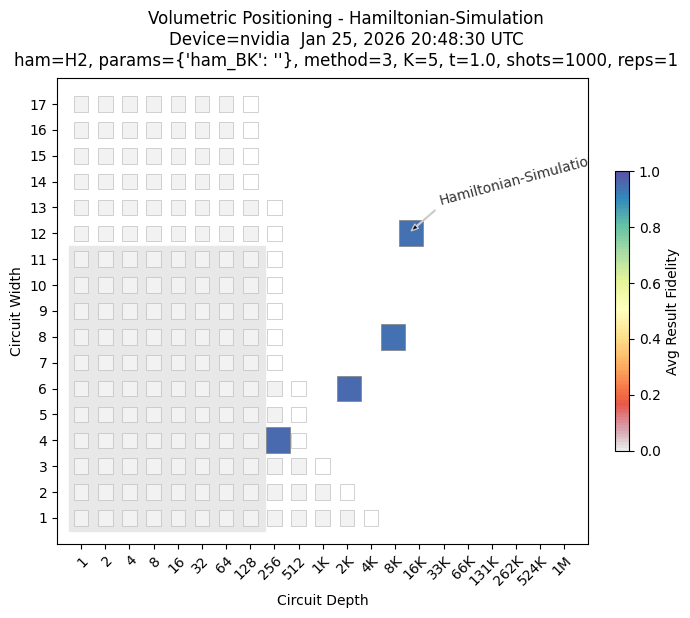

In [8]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=3, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,
                do_sqrt_fidelity = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options, api=api)

### Combined Benchmark Results

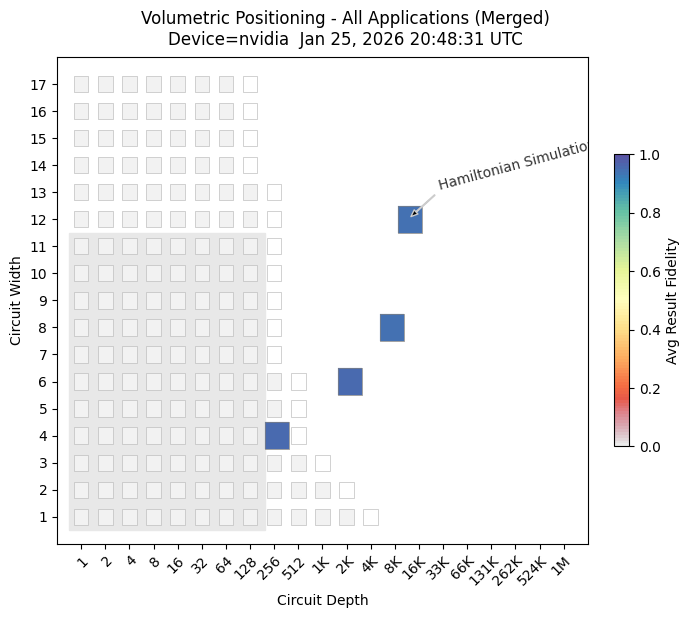

In [9]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)

In [11]:
import cudaq
print(cudaq.__version__)

CUDA-Q Version amd64-cu12-0.13.0 (https://github.com/NVIDIA/cuda-quantum b66c5bb7fd8c08e5014e2f03e97e7b0e92691650)
